##### PROJECT DATA SCIENCE
##### MSDS-2024-124


# "Predicting Telecom Customer Churn"

### OUTLINE ###
###### 1. Import Libraries 
###### 2. Load and Inspect the Dataset
###### 2.1 Dataset Overview
###### 3. Data Cleaning
###### 3.1 Handle Missing Values and irrelevant columns
###### 4. Exploratory Data Analysis (EDA)
###### 4.1 Churn Distribution
###### 4.2 Numerical Feature Distribution
###### 4.3 Categorical Feature Analysis
###### 5. Data Preparation
###### 5.1 Correlation
###### 5.2 Detecting Outliers
###### 5.3 Visualize Outliers 
###### 6. Model Selection and Evaluation
###### 6.1 Confusion Matrix
###### 7 Feature Importance

### 1.Import Libraries 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV


### 2.Load and Inspect the Dataset

In [5]:
data = pd.read_excel('Telco_customer_churn.xlsx')
file_path = 'Telco_customer_churn.xlsx'
data = pd.ExcelFile(file_path)
TELCO = data.parse(data.sheet_names[0]) 

### 2.1 Dataset Overview


In [8]:
print(TELCO.columns)

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


In [10]:
print(TELCO.shape)

(7043, 33)


In [12]:
print(TELCO.dtypes)

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object


In [14]:

print(TELCO.head())
print(TELCO.tail())

   CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender  ...        Contract  \
0  33.964131, -118.272783  33.964131 -118.272783    Male  ...  Month-to-month   
1   34.059281, -118.30742  34.059281 -118.307420  Female  ...  Month-to-month   
2  34.048013, -118.293953  34.048013 -118.293953  Female  ...  Month-to-month   
3  34.062125, -118.315709  34.062125 -118.315709  Female  ...  Month-to-month   
4  34.039224, -118.266293  34.039224 -118.266293    Male  ...  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Tota

In [16]:
print(TELCO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [18]:
print(TELCO.isnull().sum())

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64


### 3.Data Cleaning


### 3.1 Handle missing values and irrelevant columns

In [22]:
# Handle missing values in 'Total Charges'
TELCO['Total Charges'] = pd.to_numeric(TELCO['Total Charges'], errors='coerce')
TELCO.dropna(subset=['Total Charges'], inplace=True)

# Drop irrelevant columns
columns_to_drop = ['CustomerID', 'Lat Long', 'Country', 'City', 'State', 'Zip Code', 'Churn Reason']
TELCO_cleaned = TELCO.drop(columns=columns_to_drop)

# Verify cleaning
print("\nMissing Values After Cleaning:")
print(TELCO_cleaned.isnull().sum())



Missing Values After Cleaning:
Count                0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64


### 4.Exploratory Data Analysis (EDA)


### 4.1 Churn Distribution

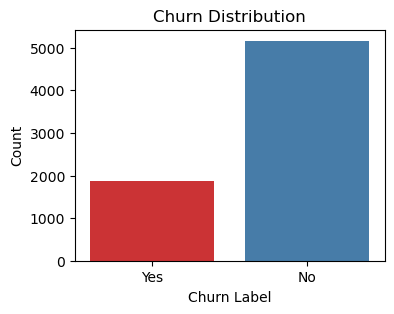

In [26]:

plt.figure(figsize=(4, 3))
sns.countplot(data=TELCO_cleaned, x='Churn Label', hue='Churn Label', dodge=False, palette='Set1', legend=False)
plt.title('Churn Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Count')  
plt.show()


### 4.2 Numerical Feature Distribution

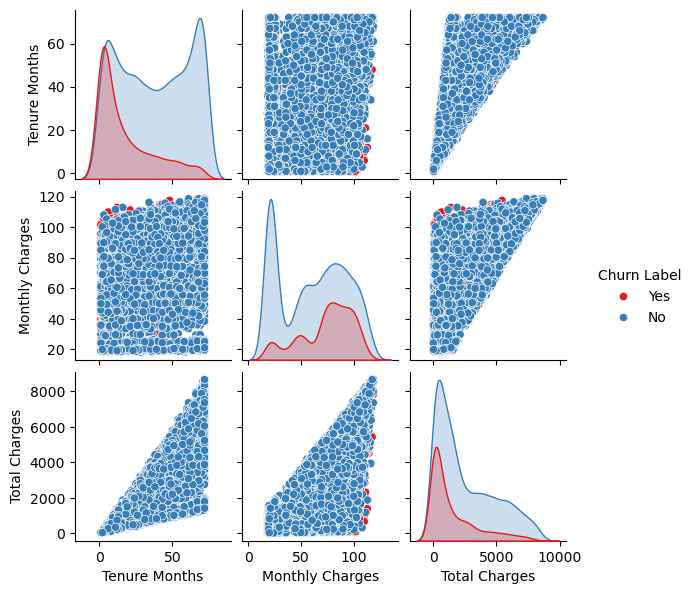

In [29]:
# Pairplot for key numerical features
sns.pairplot(TELCO_cleaned, vars=['Tenure Months', 'Monthly Charges', 'Total Charges'], hue='Churn Label', palette='Set1',height=2)
plt.show()


### 4.3 Categorical Feature Analysis

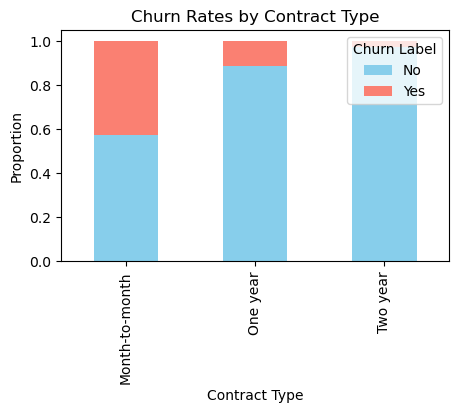

In [32]:
# Churn rates by contract type
TELCO_cleaned.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack().plot(
    kind='bar', stacked=True, figsize=(5, 3), color=['skyblue', 'salmon'], title='Churn Rates by Contract Type'
)
plt.ylabel('Proportion')
plt.xlabel('Contract Type')
plt.legend(title='Churn Label', loc='upper right')
plt.show()


### 5.Data Preparation

In [35]:

# Encode categorical features
categorical_cols = TELCO_cleaned.select_dtypes(include=['object']).columns
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    TELCO_cleaned[col] = label_encoders[col].fit_transform(TELCO_cleaned[col])


### 5.1 Correlation 

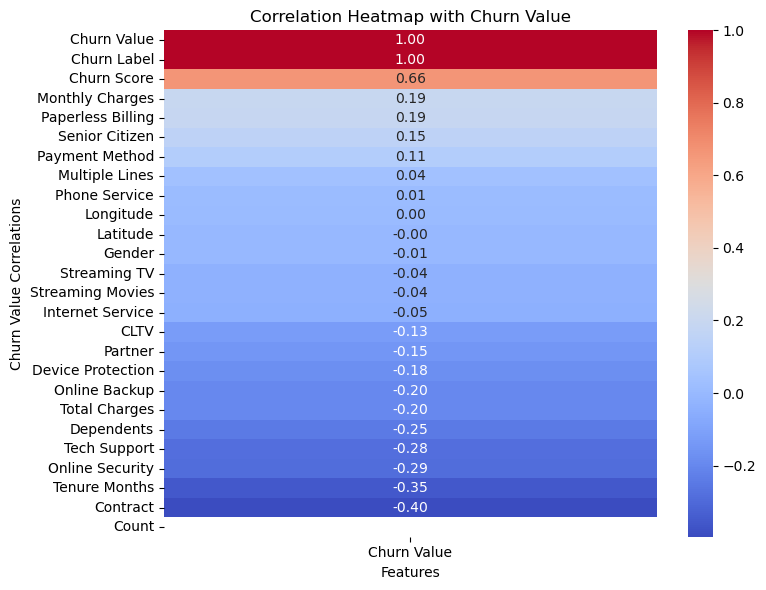

In [38]:
correlation_matrix = TELCO_cleaned.corr()
# Focus on correlations with Churn Value
correlation_with_target = correlation_matrix[['Churn Value']].sort_values(by='Churn Value', ascending=False)
# Plot a heatmap for correlations with Churn Value
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap with Churn Value')
plt.xlabel('Features')
plt.ylabel('Churn Value Correlations')
plt.tight_layout()
plt.show()


### 5.2 Detecting Outliers 

In [40]:

# Function to detect outliers
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Numerical columns for outlier detection
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']
# Convert 'Total Charges' to numeric (if necessary)
TELCO['Total Charges'] = pd.to_numeric(TELCO['Total Charges'], errors='coerce')
# Detect outliers
outlier_results = detect_outliers_iqr(TELCO, numerical_cols)
# Display detected outliers
for col, outlier_values in outlier_results.items():
    print(f"Outliers in {col}:\n{outlier_values}")


Outliers in Tenure Months:
Series([], Name: Tenure Months, dtype: int64)
Outliers in Monthly Charges:
Series([], Name: Monthly Charges, dtype: float64)
Outliers in Total Charges:
Series([], Name: Total Charges, dtype: float64)


### 5.3 Visualize Outliers

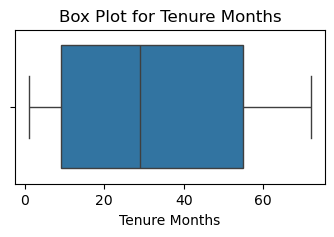

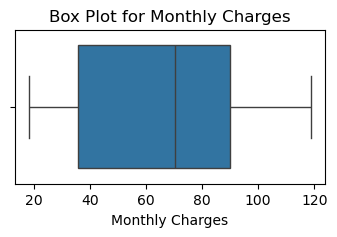

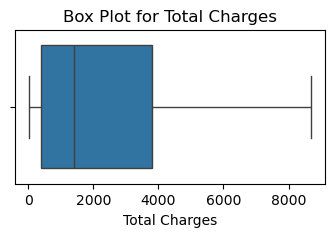

In [84]:

# Visualize outliers using boxplots
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=TELCO[col])
    plt.title(f"Box Plot for {col}")
    plt.show()


In [46]:
# Define features and target
X = TELCO_cleaned.drop(['Churn Label', 'Churn Value', 'Churn Score'], axis=1)
y = TELCO_cleaned['Churn Value']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [48]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 6.Model Training and Evaluation

### 6.1 Confusion Matrix

--- Logistic Regression ---
Accuracy: 0.8104265402843602
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1549
           1       0.65      0.62      0.63       561

    accuracy                           0.81      2110
   macro avg       0.76      0.75      0.75      2110
weighted avg       0.81      0.81      0.81      2110



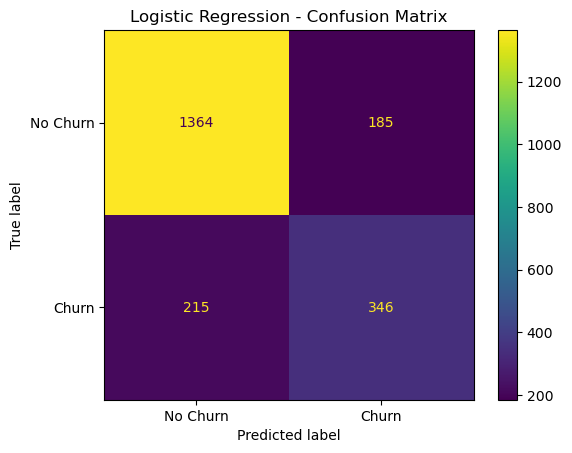

--- Random Forest ---
Accuracy: 0.7909952606635071
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



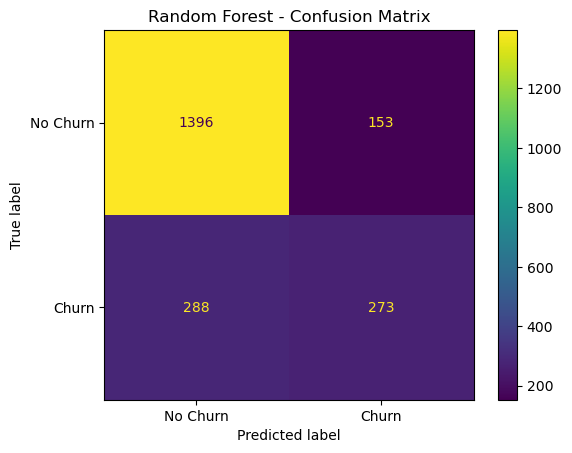

In [59]:

# Dictionary of models

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
}
# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Fit the model
    y_pred = model.predict(X_test_scaled)  # Predict on test set
    
    # Print accuracy and classification report
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
    disp.plot(cmap='viridis')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


### 7.Feature Importance 

In [33]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)




Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Accuracy: 0.8102389501052369


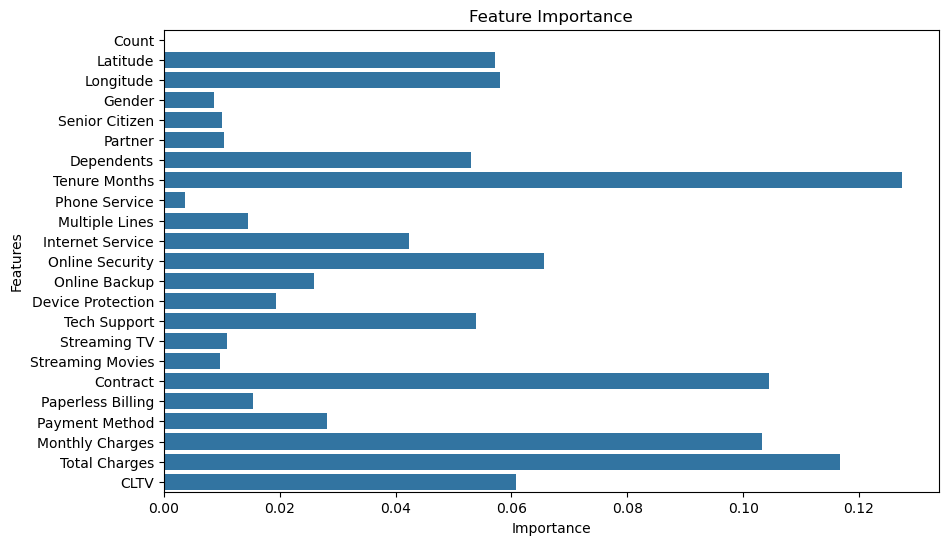

In [34]:
# Feature importance
importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
